<a href="https://colab.research.google.com/github/aarongilman/research/blob/master/fred_infl_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inflation, money velocity, and interest rates

We examine and attempt to replicate the results of two interesting articles by **Yi Wen**, Economist at the St. Louis Federal Reserve Bank, and **Maria A. Arias**:

*What Does Money Velocity Tell Us about Low Inflation in the U.S.?*, 9/1/14 http://www.stlouisfed.org/on-the-economy/what-does-money-velocity-tell-us-about-low-inflation-in-the-u-s/

*The Liquidity Trap: An Alternative Explanation for Today's Low Inflation*, April 2014, http://www.stlouisfed.org/publications/re/articles/?id=2505

from which we shall quote and edit extensively. 

Along the way, we take a detour and explore the connection between money velocity and bond rates. This will tie together their relationship with GDP and the money supply in a fitted equation.

In [ ]:
!pip install --pre fecon236

In [ ]:
#  Automatically reload modified modules:
%load_ext autoreload
%autoreload 2   
#           0 will disable autoreload.
#  Generate plots inside notebook:
%matplotlib inline

#  DISPLAY options
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True)
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8')
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
import pandas as pd
#      pandas DataFrames are represented as text by default; enable HTML representation:
#      [Deprecated: pd.core.format.set_printoptions( notebook_repr_html=True ) ]
pd.set_option( 'display.notebook_repr_html', False )

#  MATH display, use %%latex, rather than the following:
#                from IPython.display import Math
#                from IPython.display import Latex
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)

workd, = !pwd
print(workd)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/jupyter-aarongilman/inflation


In [ ]:
from fecon236 import *

In [ ]:
from fecon236.util import system
from fecon236.tool import todf, tail, tailvalue
from fecon236.host.fred import m4infl, m4bond10, m4tips10
from fecon236.host.hostess import get
from fecon236.tsa.holtwinters import foreholt
from fecon236.dst.gaussmix import gemrat

# Quick intro to monetarist theory

One of the most important theories to explain inflation is the monetarist view: according to Milton Friedman, “Inflation is always and everywhere a monetary phenomenon.” In other words, inflation occurs because there is too much money available to buy the same amount of goods and services produced in the economy. This view can also be represented by the so-called “**quantity theory of money**,” which relates the general price level, the total goods and services produced in a given period, the total money supply and the speed (velocity) at which money circulates in the economy in facilitating transactions in the following equation:

    M V = P Q

where:

    M stands for money.
    V stands for the velocity of money (or the rate at which people spend money).
    P stands for the general price level (not the rate of its growth).
    Q stands for the quantity of goods and services produced (in real terms, e.g. real GDP).

Based on this equation, *holding the money velocity constant,* if the money supply (M) increases at a faster rate than real economic output (Q), the price level (P) must increase to make up the difference.

[See details in David Colander, 2010, *Macroeconomics*, pp. 387ff for theories of inflation where the tautological equation becomes interpreted as bi-causal given added assumptions.]

[For small percentage changes, we can thus write the so-called *inflation identity*:

$ \Delta P = \Delta M + \Delta V - \Delta Q $ 

where ΔP represents the inflation rate. This equation is only useful if ΔV follows regular behavior (studied below). It also loses usefulness if the central bank lacks control over ΔM.]

In equilibrium, real money demand is understood to be Q/V.

## Money expanded enormously due to QE "quantitative easing" during the Great Recession, yet inflation did not rage upwards

From January 2009 to December 2013, the Federal Reserve's balance sheet grew by approximately $3.5 trillion due to the large-scale asset purchase (LSAP) policies implemented to aid the ailing economy after the Great Recession. These unconventional monetary policies, also known as quantitative easing (QE), increased credit availability in the private lending markets and put downward pressure on real interest rates.

*According to the monetarist view, inflation in the U.S. should have been about 31 percent per year between 2008 and 2013, when the money supply grew at an average pace of 33 percent per year and output grew at an average pace around 2 percent.* 

# Question:  **Why, then, has inflation remained persistently low (below 2%) during this period ("Great Recession")?** 

["Normal times" (1960-2007) shall refer to the postwar period prior to the Great Recession.]

In [ ]:
#  Define our start of the Great Recession:
recession = '2006-12-31'
#                ^this would include 2007-Q1 data.

#  According to the U.S. National Bureau of Economic Research 
#  (the official arbiter) the US recession began in December 2007. 
#  But the emergence of sub-prime loan losses in 2007 
#  began the global crisis. 
#  Lehman Brothers went bankrupt during September 2008.

In [ ]:
#  Let us look at headline price levels averaged, including core versions:
P = getfred( m4infl )

#  Compute YoY percentage change for INFLATION:
Prate = pcent(P, 12)

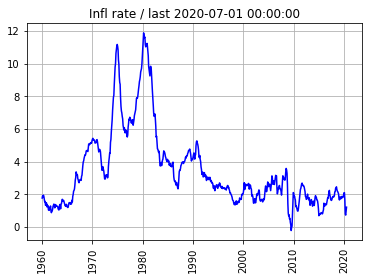

 ::  Stand-by, saving, 140 DPI: img-plotdf-Infl_rate.png


In [ ]:
#  Plot INFLATION rate:
plot( Prate, 'Infl rate' )

In [ ]:
#  Before Great Recession, our so-called "normal times":
georet( P[:recession], 12 )

[3.8, 3.8, 0.79, 12, 576, '1959-01-01', '2006-12-01']

In [ ]:
#  Great Recession through the present:
georet( P[recession:], 12 )

[1.69, 1.69, 0.54, 12, 163, '2007-01-01', '2020-07-01']

2015-03-21 The geometric mean return for prices is more than double for "normal times" 3.78% vs. "Great Recession" 1.64%. 

**Several reasons have been provided for the persistently low inflation.** For example, Janet Yellen said in 2009 that inflation would not take hold during a recession because of *little pressure for prices and wages to increase given that resources through the economy were underused.* 

Others say the unusually low inflation stems from the weakening of the money multiplier, as *banks continue to hold excess reserves instead of extending more credit through loans.* 

While others point to the FOMC's increased communications and forward guidance in anchoring future inflation expectations, as well as to the knowledge that the LSAPs will eventually be reversed.

Andolfatto and Li note when describing the effect of QE in Japan during the 2000s, **"even large changes in the monetary base are not likely to have any inflationary consequences if people generally believe the program will be reversed at some future date."** (*"Quantitative Easing in Japan: Past and Present."* Federal Reserve Bank of St. Louis Economic Synopses, 2014, No. 1, Jan. 10, 2014. See http://research.stlouisfed.org/publications/es/article/10024 )

# Answer: Velocity has not been constant, in fact, declining...

The issue has to do with the velocity of money, which has never been constant, as can be seen below. **If for some reason the money velocity declines rapidly during an expansionary monetary policy period, it can offset the increase in money supply and even lead to deflation instead of inflation.**

*The velocity of money can be calculated as the ratio of nominal gross domestic product (GDP) to the money supply (V=PQ/M), which can be used to gauge the economy’s strength or people’s willingness to spend money.* When there are more transactions being made throughout the economy, velocity increases, and the economy is likely to expand. The opposite is also true: Money velocity decreases when fewer transactions are being made; therefore the economy is likely to shrink.

    G := P*Q i.e. nominal GDP 
    
To measure money supply, we use the monetary base which includes notes and coins in circulation as well as bank reserves.    

In [ ]:
#  M used in the article is the St. Louis Adjusted Monetary Base:
M = getfred( 'BOGMBASE' )

#  Monetary base is traditionally the most liquid measure of the money supply.
#  Note that bank reserves are not included in "M1" 
#  which is another measure of the money supply.
#  Ref: https://en.wikipedia.org/wiki/Money_supply

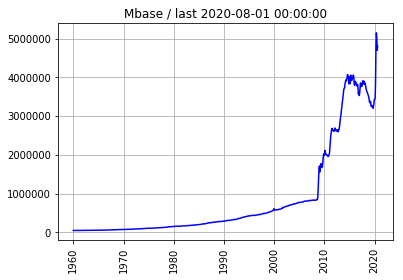

 ::  Stand-by, saving, 140 DPI: img-plotdf-Mbase.png


In [ ]:
#  Data for M goes back to 1960:
plot( M['1960':], 'Mbase' )

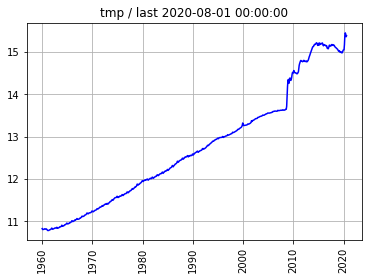

In [ ]:
#  Plot for log( M ):
plot( np.log( M['1960':] ))

In [ ]:
#  M goes parabolic after the Great Recession due to quantitative easing:
georet( M[recession:], 12)

[12.95, 14.13, 15.39, 12, 164, '2007-01-01', '2020-08-01']

2015-03-22: As of the Great Recession, the money supply, per M the monetary base, has exploded at an annual geometric rate of 19%

## "How The Economic Machine Works"

For background information, we embed a 30-minute video by Ray Dalio (founder of the largest hedge fund, Bridgewater), which shows the fundamental importance of *transactions* both from the money and credit standpoint. This sets the stage for **velocity** which is a way of quantifying transactional turnovers in the economy.

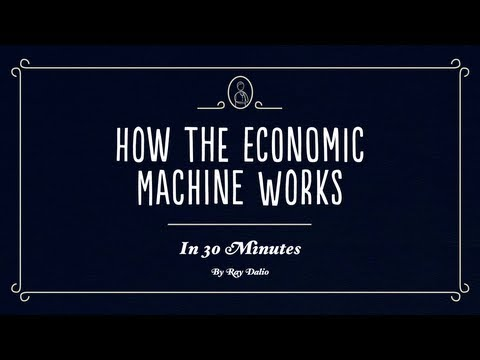

In [ ]:
YouTubeVideo( 'PHe0bXAIuk0' )

## Velocity computed and plotted

In [ ]:
#  Nominal GDP, resampled monthly:
G = getfred( m4gdpus )

In [ ]:
V = todf( G / M )

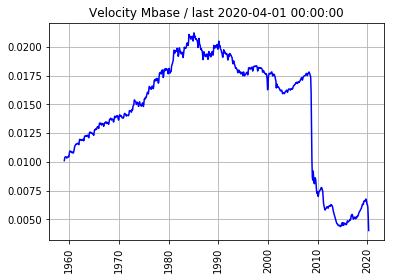

 ::  Stand-by, saving, 140 DPI: img-plotdf-Velocity_Mbase.png


In [ ]:
plot( V, 'Velocity Mbase' )

**Clearly velocity is not constant over time. The plunge after 2008 Q1 is very dramatic and  significant.**

In [ ]:
stats( V )

                Y
count  736.000000
mean     0.014553
std      0.004874
min      0.004022
25%      0.011960
50%      0.016300
75%      0.018120
max      0.021235

 ::  Index on min:
Y   2020-04-01
dtype: datetime64[ns]

 ::  Index on max:
Y   1985-02-01
dtype: datetime64[ns]

 ::  Head:
                   Y
T                   
1959-01-01  0.010113
1959-02-01  0.010329
1959-03-01  0.010427
 ::  Tail:
                   Y
T                   
2020-02-01  0.006041
2020-03-01  0.005196
2020-04-01  0.004022

 ::  Correlation matrix:
     Y
Y  1.0


During the second quarter of 2014, the velocity of the monetary base was at 4.4, its slowest pace on record. This means that every dollar in the monetary base was spent only 4.4 times in the economy, severely down from 17.2 times just prior to the Great Recession. 

This implies that the unprecedented monetary base increase driven by the Fed’s large money injections through its large-scale [QE] asset purchase programs has failed to cause at least a one-for-one proportional increase in nominal GDP. Thus, **it is precisely the sharp decline in velocity that has offset the sharp increase in money supply, leading to the almost no change in nominal GDP** (either P or Q).

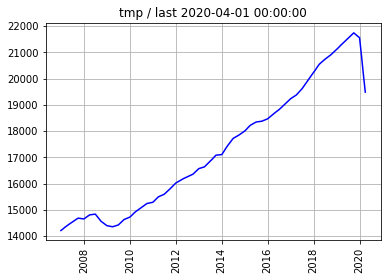

In [ ]:
#  Okay, so let's look at nominal GDP:
plot( G[recession:] )

In [ ]:
#  Well, their research needs correction, for there's is indeed change in nominal GDP. 

georet( G[recession:], 12 )

#  2015-03-22: about +2.8% per annum since 2007:

[2.39, 2.4, 1.87, 12, 160, '2007-01-01', '2020-04-01']

In [ ]:
from fecon236.tsa.holtwinters import *

#  So where is velocity heading in the next 12 months?
holtfred( V, 12 )

    Forecast
0   0.004022
1   0.005307
2   0.005118
3   0.004929
4   0.004740
5   0.004551
6   0.004362
7   0.004173
8   0.003984
9   0.003795
10  0.003606
11  0.003417
12  0.003228

In [ ]:
#  If M and Q are held fixed, then the 
#  change in V should predict the change in P,
#  i.e. the inflation rate:

(3.87 / 4.38) - 1
#  as of 2015-03-23 = -11.6% which is very deflationary, 
#  even given modest GDP growth. M probably will stabilize 
#  since QE has ceased.

-0.11643835616438347

## Near zero rates lead many to hoard money, thus the decline in velocity

So why did the monetary base increase not cause a proportionate increase in either the general price level or GDP? The answer lies in the private sector’s dramatic increase in their willingness to hoard money instead of spend it. **Why would people suddenly decide to hoard money instead of spending it?** A possible answer lies in the combination of two issues:

- **A glooming economy after the financial crisis**
    
- **The dramatic decrease in interest rates (to zero) that has forced investors to readjust their portfolios toward liquid money and away from interest-bearing assets such as government bonds**

In this regard, the unconventional monetary policy has reinforced the recession by stimulating the private sector’s money demand through pursuing an excessively low interest rate policy (i.e., the zero-interest rate policy, ZIRP). Indeed, during the pre-recession period, for every 1 percentage point decrease in 10-year Treasury note interest rates, the velocity of the monetary base decreased 0.17 points, based on a linear regression model of the velocity onto interest rates. Since 10-year interest rates declined by about 0.5 percentage points between 2008 and 2013, the velocity of the monetary base should have decreased by about 0.085 points. But the actual velocity has gone down by 5.85 points, 69 times larger than predicted. This happened because *the nominal interest rate on short-term bonds has declined essentially to zero, and, in this case, **the best form of risk-free liquid asset is no longer the short-term government bonds, but money.** * 

*Notes:*

- [Bond rates can be expected to drop *ceteris paribus* if economic transactions decline. But the numbers provided in the last paragraph need to be double-checked -- which we will do next. ]

- [In a negative interest rate environment, there's even talk of starting ETFs which buys currency notes and stores them in a vault as an investment. Such notes can be considered as zero-coupon perpetual bearer bonds at 0%.] 

- [Since the Great Recession, qualification for credit has become extremely strict, which would of course diminish consumer spending. The financial instruments used to manage credit risk have become heavily regulated and discouraged under the Volker rule.]

# Velocity as a function of bond rates?

In [ ]:
#  We try replicate the findings above:
bond = getfred( m4bond10 )
#  Yields for 10-year Treasuries, resampled monthly.

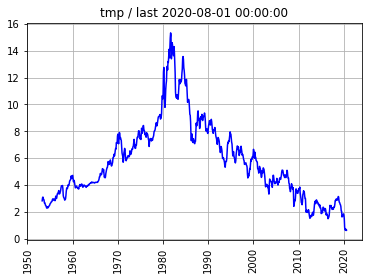

In [ ]:
#  Actual yields (not the model):
plot( bond )

In [ ]:
#   First before the Great Recession:
stat2( V['Y'][:recession], bond['Y'][:recession] )

 ::  FIRST variable:
count    720.000000
mean      16.334226
std        3.729462
min        7.214050
25%       14.507997
50%       16.937025
75%       19.155042
max       22.253831
Name: Y, dtype: float64

 ::  SECOND variable:
count    645.000000
mean       6.496310
std        2.693331
min        2.290000
25%        4.260000
50%        6.110000
75%        7.900000
max       15.320000
Name: Y, dtype: float64

 ::  CORRELATION
0.9022137184657419
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     2814.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):          4.99e-237
Time:                        14:00:43   Log-Likelihood:                -1062.9
No. Observations:                 645   AIC:                             2130

For 55 years before the Great Recession, there is nice relationship between bond rates and velocity ($R^2 = 0.80$). A 100 basis point change in yield translated to 0.97 velocity points. 

$ V = 0.97 B + 10.96 $

The bond rate B can be approximated as follows (before QE):

$ B \approx (PQ/M) - 10.72 $



## Bond rates in terms of money supply and nominal GDP

Now we can see how the ratio of nominal GDP to money supply influences bond rates.  

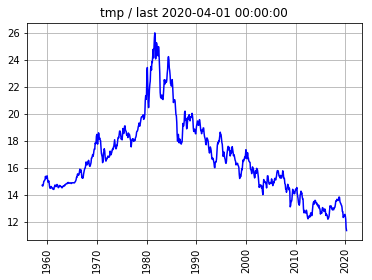

In [ ]:
#  Recall that P*Q is our variable G for nominal GDP.
bondmodel = todf((G / M) - 10.7242)

#  We plot the DEVIATIONS for our bond rate model:
#  (actual - model) through today.
bonddev = todf( bond - bondmodel )

plot( bonddev )

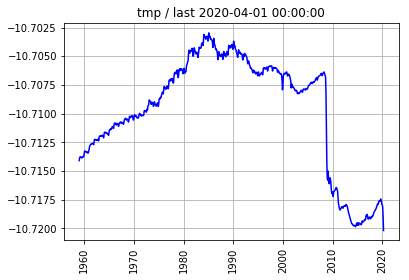

In [ ]:
#  Let's plot the model itself, i.e. bond rate approximations:
plot( bondmodel )

In [ ]:
#  Deviations before the Great Recession
bonddev[:recession].describe()

                Y
count  576.000000
mean    17.617544
std      2.546991
min     14.038140
25%     15.455147
50%     17.206287
75%     18.770095
max     26.024319

**The bond rate model seems to work $\pm$ 128 basis points per one standard deviation for almost six decades until the Great Recession wacks it out-of-order.** It was a very broad-stroke model anyways, not fine enough for trading bonds -- but adequate to show a definite change in interest rate regime.

(The constant 10.7242 was adjusted until we got *zero mean* for bonddev before the Great Recession.)

2015-03-23: The "normal" bond rate model estimates a 10-year Treasury rate 900 basis points *below* the current yield of +2%, i.e. a negative yield around -7%. This of course is due to the upward explosion in the monetary base M in a dampened inflation environment. (Notice the negative rates during the 1950's as projected by the the model.)

*Next we look at the relationship since the Great Recession:*

In [ ]:
#   Since the Great Recession:
stat2( V['Y'][recession:], bond['Y'][recession:] )

 ::  FIRST variable:
count    160.000000
mean       0.007483
std        0.004108
min        0.004022
25%        0.005064
50%        0.006046
75%        0.007518
max        0.017833
Name: Y, dtype: float64

 ::  SECOND variable:
count    164.000000
mean       2.650976
std        0.915311
min        0.620000
25%        1.980000
50%        2.530000
75%        3.222500
max        5.100000
Name: Y, dtype: float64

 ::  CORRELATION
0.7776093826883606
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     241.7
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           1.17e-33
Time:                        15:15:48   Log-Likelihood:                 726.90
No. Observations:                 160   AIC:                            -1450

2015-03-23: Since the Great Recession, the relationship between bond rates and velocity has deteriorated ($R^2 = 0.61$). A 100 basis point change in yield now translates to 4.00 velocity points -- which is about four times "normal." But the relationship in this period is not very significant, and **also QE obviously distorted market yields for bonds**. 

# Alternative explanation for low inflation: the *liquidity trap*

Conventionally, the expansion of the money supply will generate inflation as more money is chasing after the same amount of goods available. **During a liquidity trap, however, increases in money supply are fully absorbed by excess demand for money (liquidity); investors hoard the increased money instead of spending it because the opportunity cost of holding cash — the forgone earnings from interest — is zero when the nominal interest rate is zero.** *Even worse, if the increased money supply is through LSAPs on long-term debts (as is the case under QE), investors are prompted to further shift their portfolio holdings from interest-bearing assets to cash.*

On one hand, if the increase in money demand is proportional to the increase in money supply, inflation remains stable. On the other hand, if money demand increases more than proportionally to the change in money supply due to the downward pressure LSAPs exert on the interest rate, the price level must fall to absorb the difference between the supply and demand of money. That is, *the increase in aggregate demand for real money balances then has to be accommodated by an overall decrease in the price level for any given money supply in the goods market. Therefore, the lower the interest rate through LSAPs, the lower the price level (due to the disproportionately higher money demand). The Fed's policy to pay positive interest rates on reserves can only reinforce the problem by making cash more attractive as a store of value.*

Yi Wen showed in 2013 that large-scale asset purchases by the Fed could reduce the real interest rate by 2 percentage points, but would have an insignificant effect on aggregate employment and fixed capital investment, would reduce the aggregate price level significantly, and would put severe downward pressure on the inflation rate — thanks to firms' portfolio adjustments between cash and financial assets in a liquidity trap.

### Risks of Declining Inflation

Not only high inflation, but low inflation can be bad for the economy. Low inflation makes cash more attractive to investors as a store of value, everything else being equal. This makes the liquidity trap easier to occur and gives the Fed less room to reduce the real interest rate as desired during a recession. Furthermore, quantitative easing through LSAPs can reinforce the liquidity trap by further reducing the long-term interest rate. In other words, *more monetary injections during a liquidity trap can only reinforce the liquidity trap by keeping the inflation rate low* (or the real return to money high).

Therefore, the correct monetary policy during a liquidity trap is not to further increase money supply or reduce the interest rate but to *raise inflation expectations by raising the nominal interest rate.* If LSAP policies are reversed and the money supply decreases as the Fed sells assets in the marketplace, the nominal interest rate will increase and investors will be more likely to shift their portfolios away from cash toward interest-bearing assets. If demand for money decreases more than proportional to the decrease in money supply due to upward pressure on the interest rate, inflation will increase. In other words, **only when financial assets become more attractive than cash can the aggregate price level increase.**



*Notes*

- [Keynesians have pointed to a major example of ineffectiveness of Fed's open market operations on managing the money supply during the Great Recession. Short-term interest rates went as low as they could go in nominal terms, but no more monetary stimulus could occur. This zero bound problem has been called the liquidity trap or *"pushing on a string"* (the pusher being the central bank and the string being the real economy).]

In [ ]:
#  Flow has obviously shifted to equities (record highs), 
#  but let's look at the classic risk-free financial asset:
#  90-day T-bills
bills = getfred( m4bills )

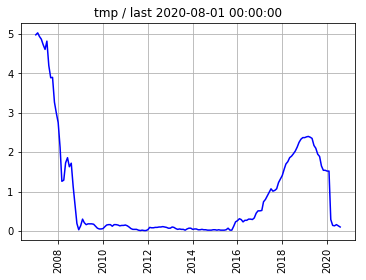

In [ ]:
plot( bills[recession:] )

In [ ]:
#  T-bill stats since 2010:
stats(bills['2010':])

                Y
count  128.000000
mean     0.562422
std      0.771339
min      0.010000
25%      0.047500
50%      0.130000
75%      0.987500
max      2.400000

 ::  Index on min:
Y   2011-09-01
dtype: datetime64[ns]

 ::  Index on max:
Y   2019-03-01
dtype: datetime64[ns]

 ::  Head:
               Y
T               
2010-01-01  0.06
2010-02-01  0.11
2010-03-01  0.15
 ::  Tail:
               Y
T               
2020-06-01  0.16
2020-07-01  0.13
2020-08-01  0.10

 ::  Correlation matrix:
     Y
Y  1.0


2020-09-16: The annual average return for Treasury bills since 2010 is a mere 56 basis points. So 100,000 only yields 560 annually -- and, any reasonable fees would certainly wipe out interest income!

## Concluding remarks

Of course, this type of *policy-reinforced liquidity trap would take place only if the economy is in a deep recession in the first place. If the economy is not in a recession, monetary injections should lead to more inflation instead of less inflation because a lower interest rate generally reduces people's incentive to save and increases their incentive to spend.*

The irony is that expansionary monetary policy is often called for only when the economy is in a recession. This policy dilemma makes economics a dismal science. One way to escape from it is to use expansionary fiscal policy (as suggested by the economist John Maynard Keynes). However, with the already high level of government debt across industrial countries, it takes courage and vision to implement bold expansionary fiscal policies.

## Addendum

- **On 29 October 2014, the Federal Reserve announced it would stop its sprawling six-year-old stimulus program, known as quantitative easing (a.k.a. QE or LSAP).** The Fed’s balance sheet was under \$1 trillion when it started buying bonds through QE -- currently its balance sheet is over \$4 trillion. To get back to "normal," the Fed will need find an orderly way to sell lots of bonds (without market panic). 